# Small worlds

Este notebook consiste no estudo do tráfego aéreo brasileiro, com um dataset composto por dados disponibilizados pela ANAC. O dataset foi obtido por meio dos códigos disponíveis no [Github de Álvaro](https://github.com/alvarofpp/dataset-flights-brazil).

In [7]:
# import usefull packages
!pip install nxviz==0.6.3
!pip install geocoder==1.38.1
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
nxviz 0.6.3 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns
import pandas as pd

In [10]:
!python extract.py

!python transform_to_anac_csv.py
!python transform_to_airports_csv.py
!python transform_to_graphml.py

100% 24/24 [04:29<00:00, 11.24s/it]


In [3]:
G = nx.read_graphml('./data/air_traffic.graphml')

airports = pd.read_csv('./data/airports.csv', index_col="code")

airports.head()

,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
code,,,,,,,,
KDFW,"DALLAS & FORT WORTH, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,32.896801,-97.038002
KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,40.639801,-73.778900
KMIA,"MIAMI, FLORIDA",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,25.793200,-80.290604
SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-22.809999,-43.250557
SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-23.435556,-46.473057


In [13]:
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 1124 nodes and 10132 edges


### Getting Brazil Traffic

In [4]:
br_traffic = list(node[0] for node in G.nodes(data=True) if node[1]["country"] == "BRASIL")
G_brasil = nx.subgraph(G, br_traffic)

nx.write_graphml(G_brasil, path='data/air_traffic_brasil.graphml')

G_brasil = nx.read_graphml('./data/air_traffic_brasil.graphml')

print("The network has {} nodes and {} edges".format(G_brasil.number_of_nodes(),
                                                     G_brasil.number_of_edges()))

The network has 510 nodes and 4568 edges


In [5]:
for node in G_brasil.nodes(data=True):
    node[1]["state"] = airports.loc[node[0], "state"]
    node[1]["region"] = airports.loc[node[0], "region"]
    
G_brasil.nodes(data=True)

NodeDataView({'SDLU': {'name': 'BARRA BONITA', 'country': 'BRASIL', 'latitude': -22.48310089111328, 'longitude': -48.52450180053711, 'state': 'SP', 'region': 'SUDESTE'}, 'SBLN': {'name': 'LINS', 'country': 'BRASIL', 'latitude': -21.663999557495, 'longitude': -49.730499267578, 'state': 'SP', 'region': 'SUDESTE'}, 'SBCO': {'name': 'CANOAS', 'country': 'BRASIL', 'latitude': -29.945928, 'longitude': -51.144413, 'state': 'RS', 'region': 'SUL'}, 'SBCV': {'name': 'CARAVELAS', 'country': 'BRASIL', 'latitude': -17.6523, 'longitude': -39.253101, 'state': 'BA', 'region': 'NORDESTE'}, 'SWIQ': {'name': 'MINAÇU', 'country': 'BRASIL', 'latitude': -16.253079999999954, 'longitude': -47.94987999999995, 'state': 'GO', 'region': 'CENTRO-OESTE'}, 'SBGO': {'name': 'GOIÂNIA', 'country': 'BRASIL', 'latitude': -16.631999969482422, 'longitude': -49.220699310302734, 'state': 'GO', 'region': 'CENTRO-OESTE'}, 'SIMK': {'name': 'FRANCA', 'country': 'BRASIL', 'latitude': -20.592199, 'longitude': -47.3829, 'state': 'S

## 1 - Study on the assortativity

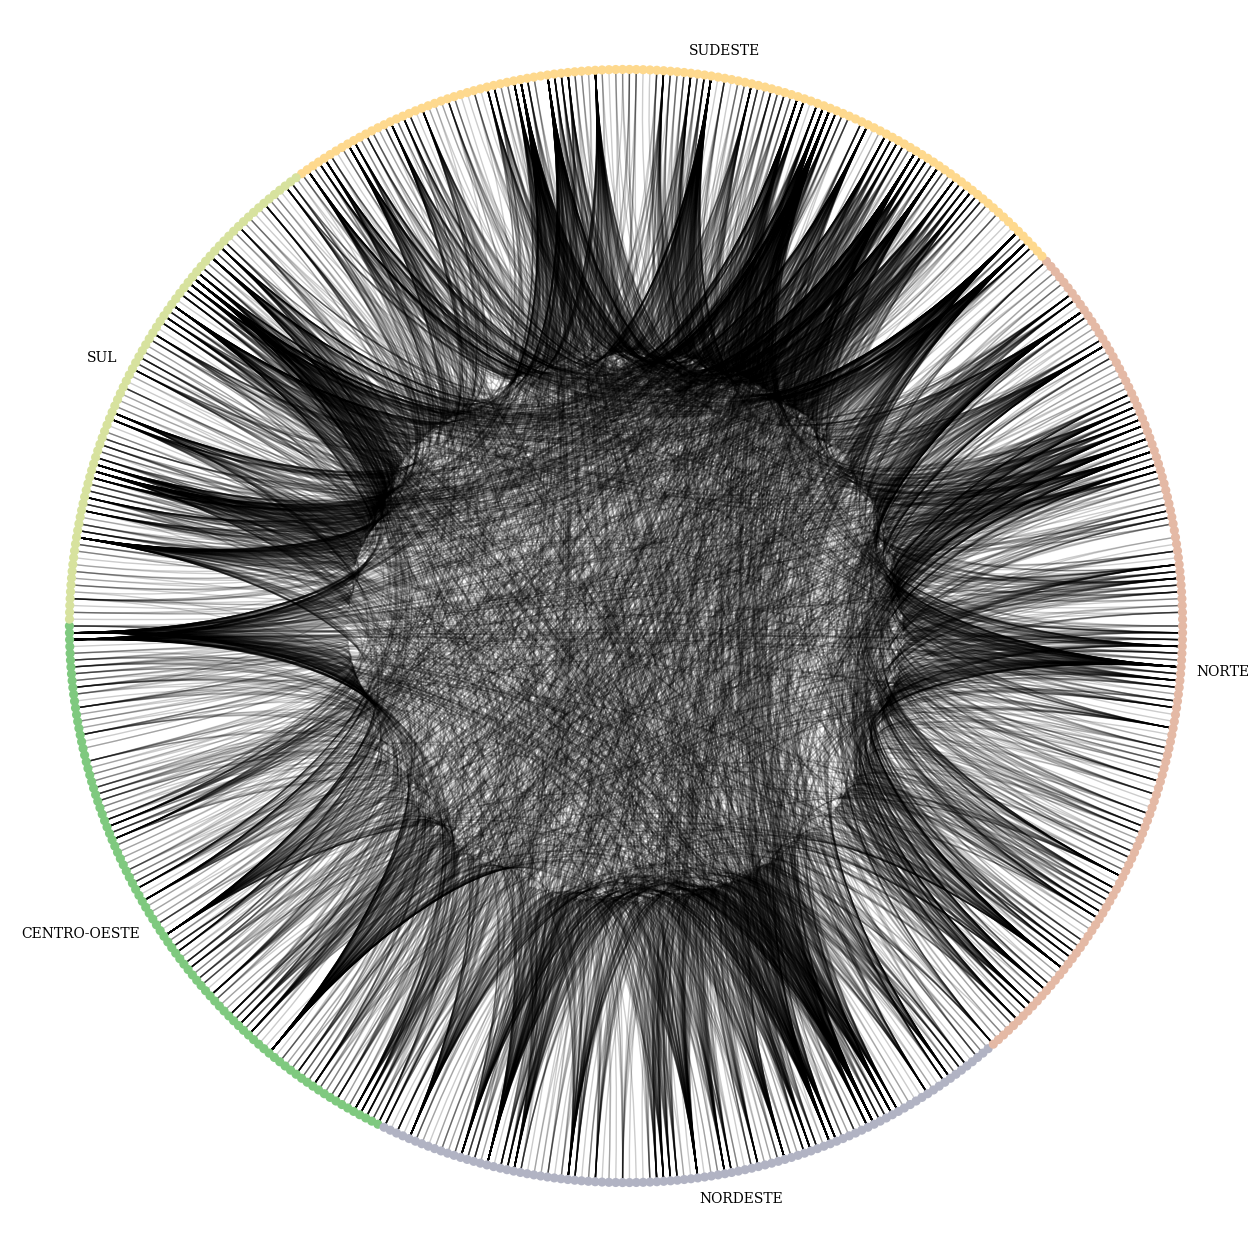

0.37291232237638355

In [7]:
c = nv.CircosPlot(G_brasil,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(20,16))

c.draw()

plt.savefig("grafico.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()

nx.attribute_assortativity_coefficient(G_brasil, "region")

In [21]:
nx.attribute_mixing_matrix(G_brasil,'region')

array([[0.05341506, 0.01204028, 0.0339317 , 0.02287653, 0.0107268 ],
       [0.01204028, 0.07289842, 0.04049912, 0.00711471, 0.01335377],
       [0.0339317 , 0.04049912, 0.17294221, 0.02758319, 0.05461909],
       [0.02287653, 0.00711471, 0.02758319, 0.13222417, 0.02035902],
       [0.0107268 , 0.01335377, 0.05461909, 0.02035902, 0.08231173]])

#### Assortativity coefficient

- $-1 <= x < 0 \Rightarrow$ The network is disassortativity
- $0 <= x <= 1 \Rightarrow$ The network is assortativity

Thus, the associative coefficient shows us that this network is assortative, that is, nodes of a group tend to interact with other nodes of the same group.

## 2 - Bivariate analysis 

In [8]:
nx.degree_assortativity_coefficient(G_brasil)

-0.19605264855558172

In [9]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_brasil).items())

degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)
print(degree)
print(avg_neigh_degree)

[1, 3, 2, 16, 8, 134, 18, 130, 133, 13, 5, 23, 11, 164, 4, 7, 24, 10, 6, 36, 15, 52, 48, 22, 75, 17, 56, 12, 62, 85, 124, 20, 32, 49, 64, 9, 156, 31, 21, 59, 108, 92, 0, 19, 72, 34, 168, 53, 95, 35, 42, 40, 87, 44, 41, 25, 122, 14, 29, 58, 91, 159, 26, 88, 37, 128, 97, 54, 28, 61, 45, 100, 132, 57, 60, 139, 50, 131, 69, 47, 79, 127, 46, 30, 63, 113, 39, 27, 66]
[112.91304347826087, 73.43243243243244, 77.65, 93.09375, 58.8515625, 45.776119402985074, 64.34722222222223, 46.37692307692308, 50.05263157894737, 61.69230769230769, 68.824, 53.30434782608695, 68.1590909090909, 42.21341463414634, 65.0909090909091, 65.81632653061224, 72.22916666666667, 56.16, 60.81159420289855, 73.22222222222223, 67.25714285714285, 69.27884615384616, 77.30208333333333, 90.6948051948052, 68.65333333333334, 75.00840336134453, 70.66964285714286, 51.20454545454545, 68.79032258064517, 53.63529411764706, 50.153225806451616, 60.2, 73.23660714285714, 83.8639455782313, 74.125, 64.9074074074074, 44.55769230769231, 70.077419

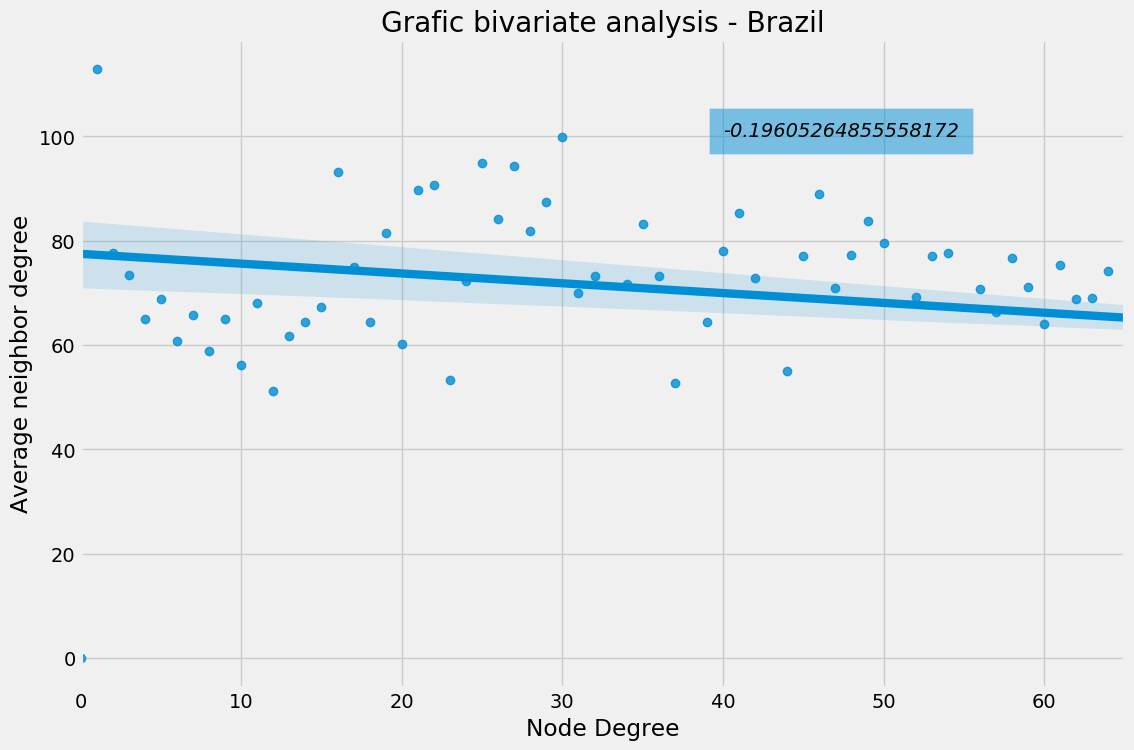

In [15]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(x=degree,y=avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neighbor degree")
ax.text(40, 100, str(nx.degree_assortativity_coefficient(G_brasil)), style='italic',
        bbox={'facecolor': '#008Fd5', 'alpha': 0.5, 'pad': 10})
ax.set_xlim(0,65)
plt.title("Grafic bivariate analysis - Brazil")

# Save figure
plt.savefig("Brazil_degree_assortativity.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=True)
  
plt.show()

### Analysis by region



In [51]:
def regionBivariateAnalysis(G, region, x_text, y_text):
  region_traffic = list(node[0] for node in G.nodes(data=True) if node[1]["region"] == region)
  G_region = nx.subgraph(G, region_traffic)

  degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_region).items())
  degree = list(degree)
  avg_neigh_degree = list(avg_neigh_degree)

  plt.style.use("fivethirtyeight")
  fig, ax = plt.subplots(1,1,figsize=(12,8))

  sns.regplot(x=degree,y=avg_neigh_degree,ax=ax)

  ax.set_xlabel("Node Degree")
  ax.set_ylabel("Average neighbor degree")
  ax.text(x_text, y_text, str(nx.degree_assortativity_coefficient(G_region)), style='italic',
          bbox={'facecolor': '#008Fd5', 'alpha': 0.5, 'pad': 10})
  plt.title("Grafic bivariate analysis - " + region)

  # Save figure
  plt.savefig(region + "_degree_assortativity.png",
              format="png",
              dpi=400,
              bbox_inches="tight",
              transparent=True)
    
  plt.show()

#### North

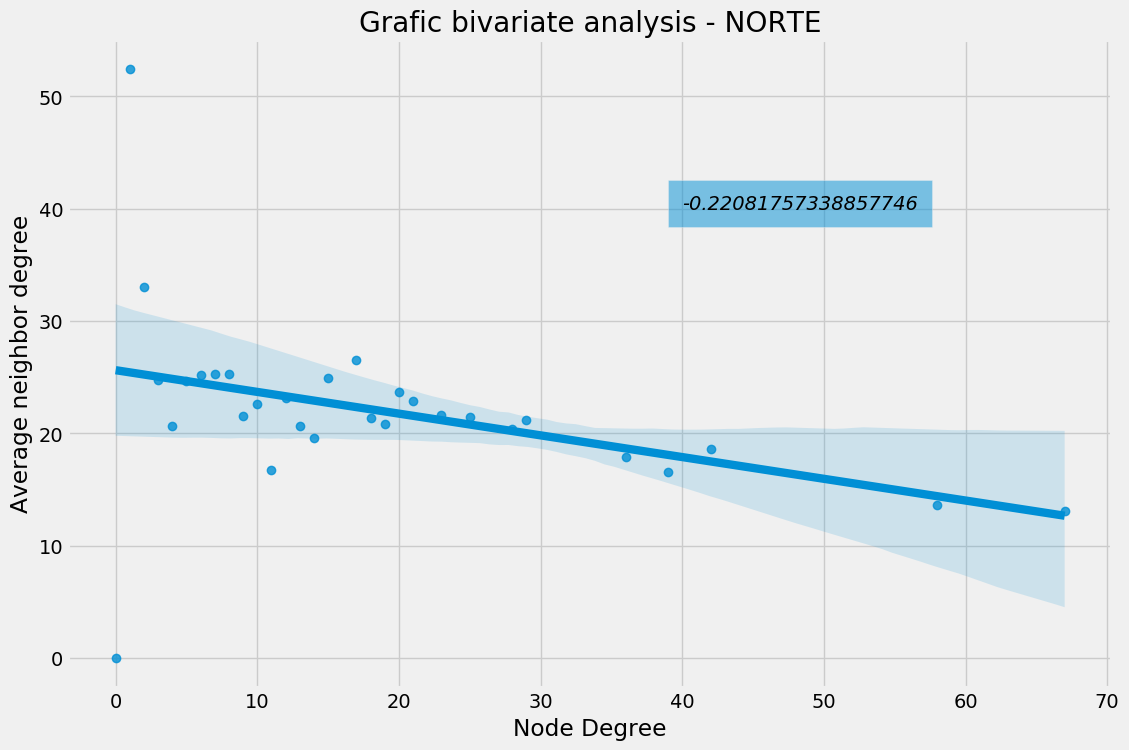

In [48]:
regionBivariateAnalysis(G_brasil, "NORTE", 40, 40)

#### Northeast

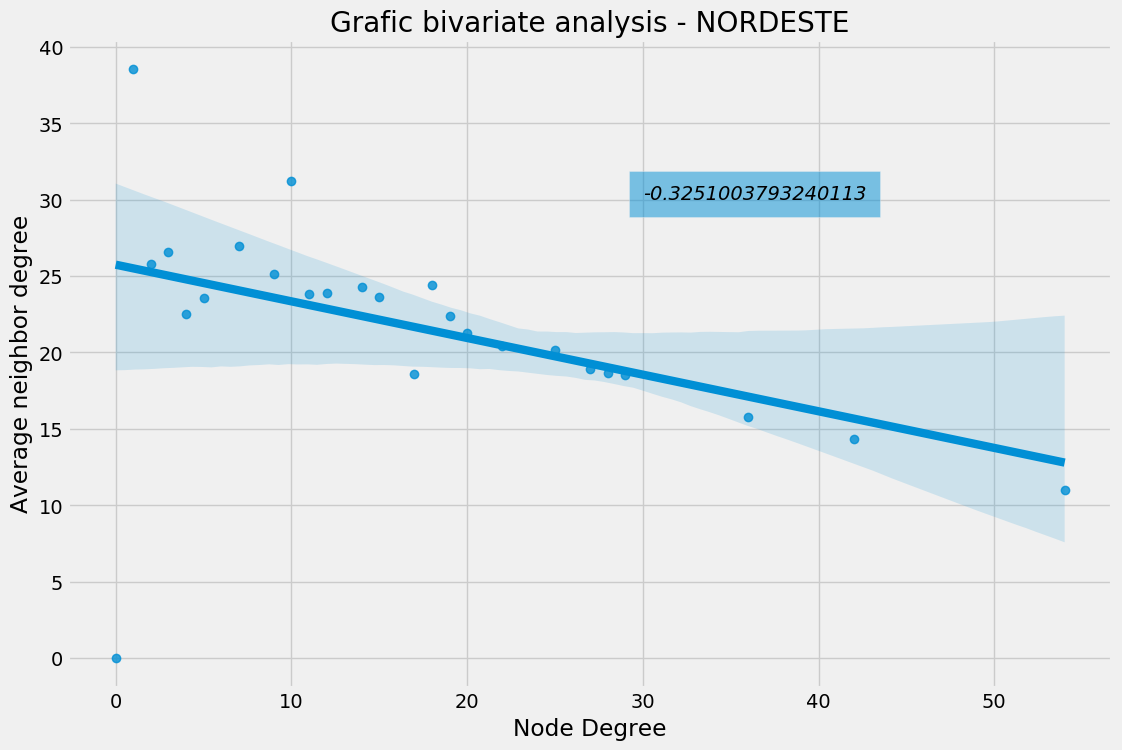

In [52]:
regionBivariateAnalysis(G_brasil, "NORDESTE", 30, 30)

#### Midwest

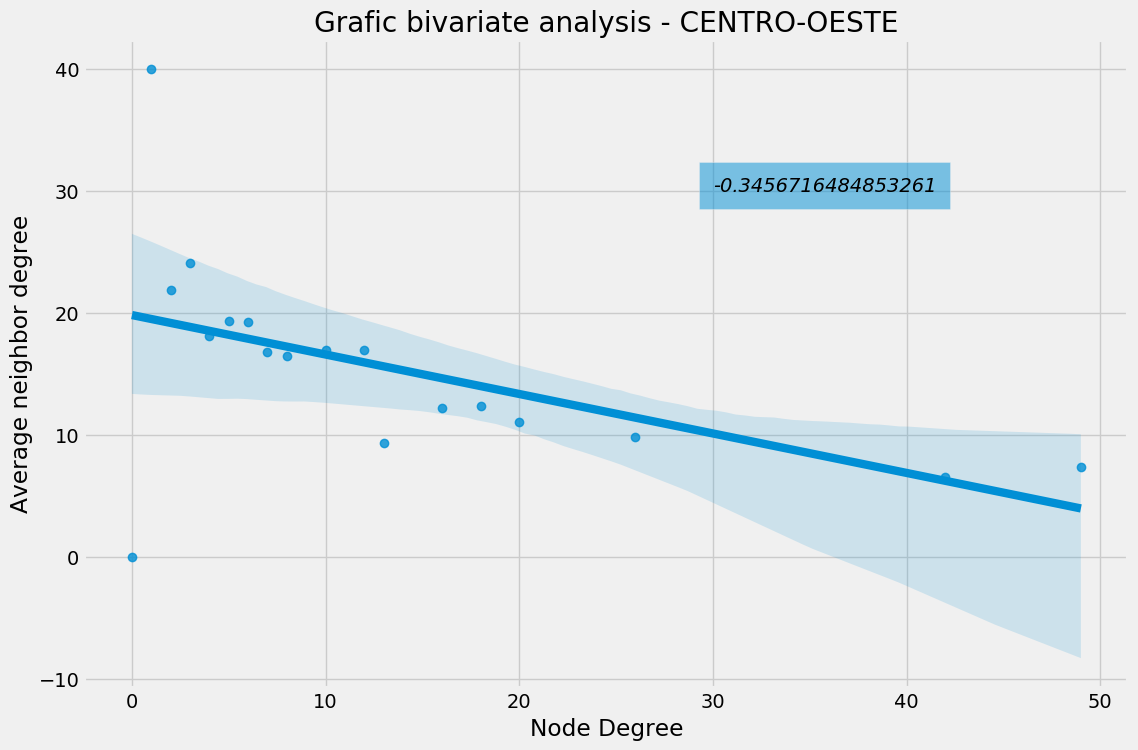

In [53]:
regionBivariateAnalysis(G_brasil, "CENTRO-OESTE", 30, 30)

#### Southeast

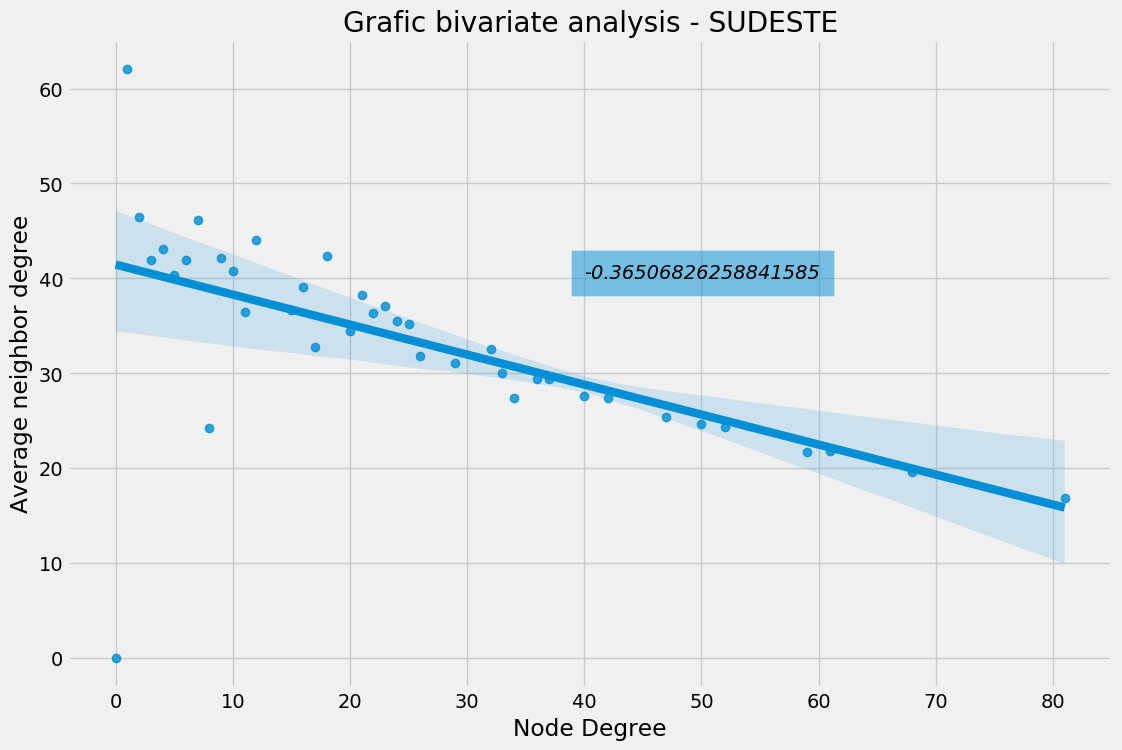

In [55]:
regionBivariateAnalysis(G_brasil, "SUDESTE", 40, 40)

#### South

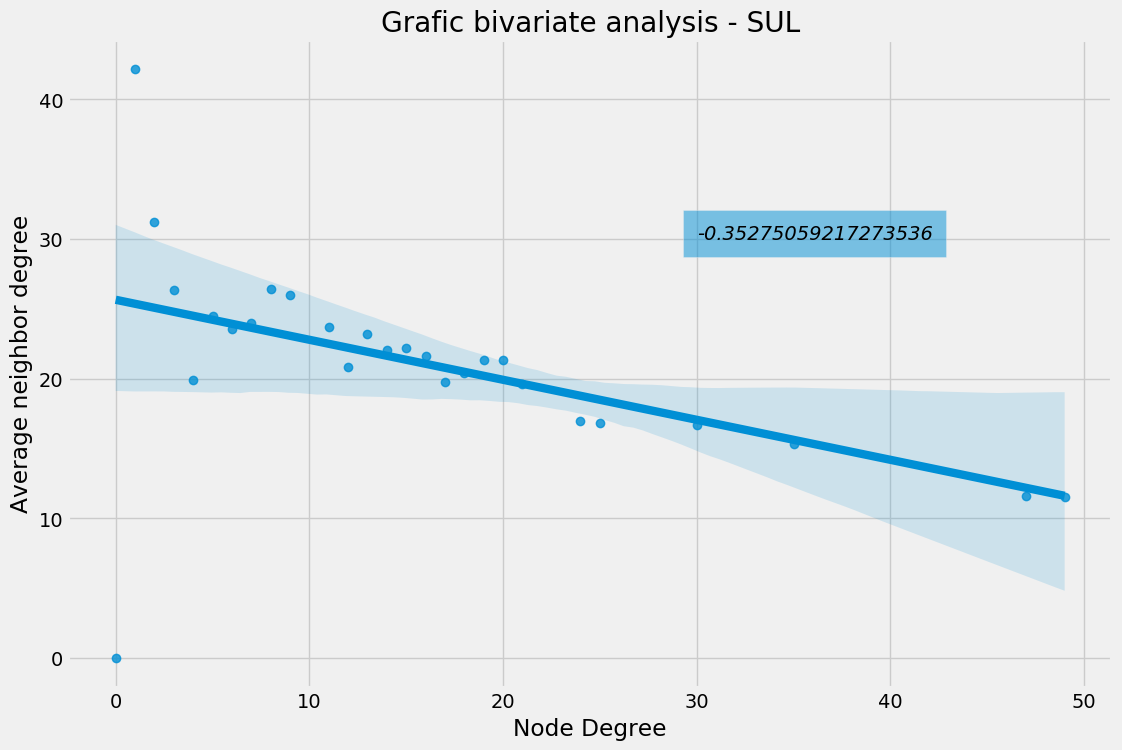

In [56]:
regionBivariateAnalysis(G_brasil, "SUL", 30, 30)

## 3 - Connected components

In [82]:
#Para achar a quantidade de componentes conectados existentes na malha aérea brasileira
print("Quantidade de componenetes conectados existentes na malha aérea brasileira: ", + nx.number_connected_components(G_brasil))
print()
print("Quantidade de elementos presente em cada componente:")
print()

for component in nx.connected_components(G_brasil):
  if(len(component) == 1): 
    G = nx.subgraph(G_brasil, list(component))
    region = list(G.nodes(data=True))[0][1]["region"]
    print(len(component), component, " => This means that 100% of the component elements belongs to region " + region)
    print()
  else:
    print(len(component), " Analysis below")
    print()

Quantidade de componenetes conectados existentes na malha aérea brasileira:  6

Quantidade de elementos presente em cada componente:

505  Analysis below

1 {'SNBG'}  => This means that 100% of the component elements belongs to region SUDESTE

1 {'SSBE'}  => This means that 100% of the component elements belongs to region CENTRO-OESTE

1 {'SBER'}  => This means that 100% of the component elements belongs to region NORTE

1 {'SBJH'}  => This means that 100% of the component elements belongs to region SUDESTE

1 {'SNGR'}  => This means that 100% of the component elements belongs to region NORTE



In [66]:
G_giant = nx.subgraph(G_brasil, list(nx.connected_components(G_brasil))[0])

norte = [node for node in G_giant.nodes(data=True) if node[1]["region"] == "NORTE"]
nordeste = [node for node in G_giant.nodes(data=True) if node[1]["region"] == "NORDESTE"]
sul = [node for node in G_giant.nodes(data=True) if node[1]["region"] == "SUL"]
sudeste = [node for node in G_giant.nodes(data=True) if node[1]["region"] == "SUDESTE"]
centro = [node for node in G_giant.nodes(data=True) if node[1]["region"] == "CENTRO-OESTE"]

print("Norte: %0.4f" % (len(norte)/G_giant.number_of_nodes()*100) + "%")
print("Nordeste: %0.4f" % (len(nordeste)/G_giant.number_of_nodes()*100) + "%")
print("Sul: %0.4f" % (len(sul)/G_giant.number_of_nodes()*100) + "%")
print("Sudeste: %0.4f" % (len(sudeste)/G_giant.number_of_nodes()*100) + "%")
print("Centro-Oeste: %0.4f" % (len(centro)/G_giant.number_of_nodes()*100) + "%")

Norte: 24.9505%
Nordeste: 18.8119%
Sul: 15.0495%
Sudeste: 23.3663%
Centro-Oeste: 17.8218%


## 4 - Shortest path

In this stage, we will simulate some trips between regions of Brazil, taking into account the connection between the regions and the airports that exist in the dataset. The trips we should simulate are as follows:

- City in the North (1) and a city in the South (2);
- City in the South (2) and a city in the Northeast (3);
- City in the Northeast (3) and a city in the Midwest (4);
- City in the Midwest (4) and a city in the Southeast (5).

To analyze the shortest path to reach the destination, we will use the function nx.shortest_path(), which will assist us by showing the name of each airport that will be visited during the trip.

In [133]:
airports_shortest_path = {
    "norte": "SBRB",             # Rio Branco, AC
    "nordeste": "SBSG",          # São Gonçalo do Amarante, RN
    "centro-oeste": "SBAN",      # Anápolis, GO
    "sudeste": "SBGR",           # Grarulhos, SP
    "sul": "SBPA"                # Porto Alegre, RS
}

airports_list = [airport for airport in airports_shortest_path.values()]

print(airports_list)

['SBRB', 'SBSG', 'SBAN', 'SBGR', 'SBPA']


In [134]:
airports.loc[airports_list]

,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
code,,,,,,,,
SBRB,RIO BRANCO,AC,NORTE,BRASIL,AMÉRICA DO SUL,NaN,-9.869031,-67.893984
SBSG,SÃO GONÇALO DO AMARANTE,RN,NORDESTE,BRASIL,AMÉRICA DO SUL,NaN,-5.768056,-35.376111
SBAN,ANÁPOLIS,GO,CENTRO-OESTE,BRASIL,AMÉRICA DO SUL,NaN,-16.229200,-48.964298
SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-23.435556,-46.473057
SBPA,PORTO ALEGRE,RS,SUL,BRASIL,AMÉRICA DO SUL,NaN,-29.994400,-51.171398


### Shortest path between the airports located in the North and South

In [131]:
shortest_north_south = nx.shortest_path(G_brasil, airports_shortest_path["norte"], airports_shortest_path["sul"])

print(shortest_north_south)

['SBRB', 'SBPA']


As we can see, the shortest path between the airports SBRB (Rio Branco/AC) and SBPA (Porto Alegre/RS) is a direct flight.

### Shortest path between the airports located in the South and Northeast

In [132]:
shortest_south_northeast = nx.shortest_path(G_brasil, airports_shortest_path["sul"], airports_shortest_path["nordeste"])

print(shortest_south_northeast)

['SBPA', 'SBSG']


In this case, there is also a direct flight between SBPA (Porto Alegre/RS) and SBSG (São Gonçalo do Amarante/RN).

### Shortest path between the airports located in the Northeast and Midwest

In [135]:
shortest_northeast_midwest = nx.shortest_path(G_brasil, airports_shortest_path["nordeste"], airports_shortest_path["centro-oeste"])

print(shortest_northeast_midwest)

['SBSG', 'SBGO', 'SBAN']


In [136]:
airports.loc[shortest_northeast_midwest[1]]

name                    GOIÂNIA
state                        GO
region             CENTRO-OESTE
country                  BRASIL
continent        AMÉRICA DO SUL
Código OACI                 NaN
lat_geo_point           -16.632
lon_geo_point        -49.220699
Name: SBGO, dtype: object

When we depart from SBSG (São Gonçalo do Amarante/RN) to SBAN (Anápolis/GO), as we can see, the shortest path between the airports includes a layover at SBGO (Goiânia, GO).

### Shortest path between the airports located in the Midwest and Southeast

In [137]:
shortest_midwest_southeast = nx.shortest_path(G_brasil, airports_shortest_path["centro-oeste"], airports_shortest_path["sudeste"])

print(shortest_midwest_southeast)

['SBAN', 'SBGO', 'SBGR']


In [138]:
airports.loc[shortest_midwest_southeast[1]]

name                    GOIÂNIA
state                        GO
region             CENTRO-OESTE
country                  BRASIL
continent        AMÉRICA DO SUL
Código OACI                 NaN
lat_geo_point           -16.632
lon_geo_point        -49.220699
Name: SBGO, dtype: object

When traveling from SBAN (Anápolis/GO) to SBGR (Guarulhos/SP) airport, it is necessary to make a layover at SBGO (Goiânia/GO).

### Cost estimate

When researching the prices for the first two scenarios, no direct flights were found. One possibility is that the airlines operated these flights for a certain period and then discontinued them due to lack of profitability.

As for the next two scenarios, it is not possible to check the prices because the Anápolis airport is a military base belonging to the Brazilian Air Force (FAB), and commercial flights are not permitted.

## 5 - Clustering coefficient

In [139]:
nx.average_clustering(G_brasil)

0.6298820670024339

As:

\begin{equation}
  0 <= Average clustering <= 1
\end{equation}

This result of $0.6298820670024339$ means that the network is well-connected, but there are some nodes that have more connections than others.

In [141]:
norte = [node[0] for node in G_brasil.nodes(data=True) if node[1]["region"] == "NORTE"]
nordeste = [node[0] for node in G_brasil.nodes(data=True) if node[1]["region"] == "NORDESTE"]
sul = [node[0] for node in G_brasil.nodes(data=True) if node[1]["region"] == "SUL"]
sudeste = [node[0] for node in G_brasil.nodes(data=True) if node[1]["region"] == "SUDESTE"]
centro = [node[0] for node in G_brasil.nodes(data=True) if node[1]["region"] == "CENTRO-OESTE"]

G_norte = nx.subgraph(G_brasil, norte)
G_nordeste = nx.subgraph(G_brasil, nordeste)
G_centro = nx.subgraph(G_brasil, centro)
G_sudeste = nx.subgraph(G_brasil, sudeste)
G_sul = nx.subgraph(G_brasil, sul)

print("North region clustering coefficient: ", + nx.average_clustering(G_norte))
print("Northeast region clustering coefficient: ", + nx.average_clustering(G_nordeste))
print("Midwest region clustering coefficient: ", + nx.average_clustering(G_centro))
print("Southeastregion clustering coefficient: ", + nx.average_clustering(G_sudeste))
print("South region clustering coefficient: ", + nx.average_clustering(G_sul))

North region clustering coefficient:  0.6129174483757457
Northeast region clustering coefficient:  0.4901000932205856
Midwest region clustering coefficient:  0.5665069530501541
Southeastregion clustering coefficient:  0.610573487003218
South region clustering coefficient:  0.5829106238880671


According to the above result, the highest clustering coefficient is observed in the Northeast region, indicating that it is the most well-connected region internally, with fewer nodes having significantly more links compared to their neighbors.

However, the least well-connected region internally is the Northeast region, meaning that there are some airports with more connections than their neighbors.